# <h1 style= "text-align: center;">Programmatic Data Wrangling - TMDB</h1>

<h2 style= "text-align: center;">By Liam Dearlove</h2>

In [49]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import ast

In [50]:
# Load the dataset into a dataframe
dataset = "TMDB_movies.csv"

df = pd.read_csv(dataset).reset_index()


In [51]:
# Checking number of rows and columns
df.shape

(4803, 21)

In [52]:
# Checking the data type for each column
df.dtypes

index                     int64
budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

In [53]:
df.head(10)

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,...,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767
8,8,2

## Checking Each Entry Is Unique

In [54]:
# Check if all unique titles
unique_titles = df['title'].unique()

len(unique_titles)

4800

In [55]:
unique = set(unique_titles)

strip = set()

for name in unique:
    strip.add(name.lower().strip())

len(strip)

4800

In [56]:
title_duplicates = df[df.duplicated('title')]
title_duplicates

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2877,2877,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",http://www.hostmovie.com/,1255,"[{""id"": 1261, ""name"": ""river""}, {""id"": 1880, ""...",ko,괴물,Gang-du is a dim-witted man working at his fat...,27.655270,...,"[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",2006-07-27,88489643,119.0,"[{""iso_639_1"": ""ko"", ""name"": ""\ud55c\uad6d\uc5...",Released,Monsters are real.,The Host,6.7,537
3693,3693,0,"[{""id"": 18, ""name"": ""Drama""}]",NaN,10844,"[{""id"": 2658, ""name"": ""new zealand""}, {""id"": 3...",en,Out of the Blue,Ordinary people find extraordinary courage in ...,0.706355,...,"[{""iso_3166_1"": ""NZ"", ""name"": ""New Zealand""}]",2006-10-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The true story of a small town massacre,Out of the Blue,5.9,18
4267,4267,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",NaN,2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1966-07-30,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He's Here Big As Life In A Real Bat-Epic,Batman,6.1,203


In [57]:
id_duplicates = df[df.duplicated('id')]
id_duplicates

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count


Length of unique titles and stripped titles is the same therefore there are no titles with whitespace errors.

However, the number of unique titles does not match the number of rows. When investigated, I realised there are 3 movies with the same name, but they are not the same movie. When I check by id, there are no duplicates.

## Films and Revenue

In [58]:
new_df = df[['budget', 'revenue']].copy()

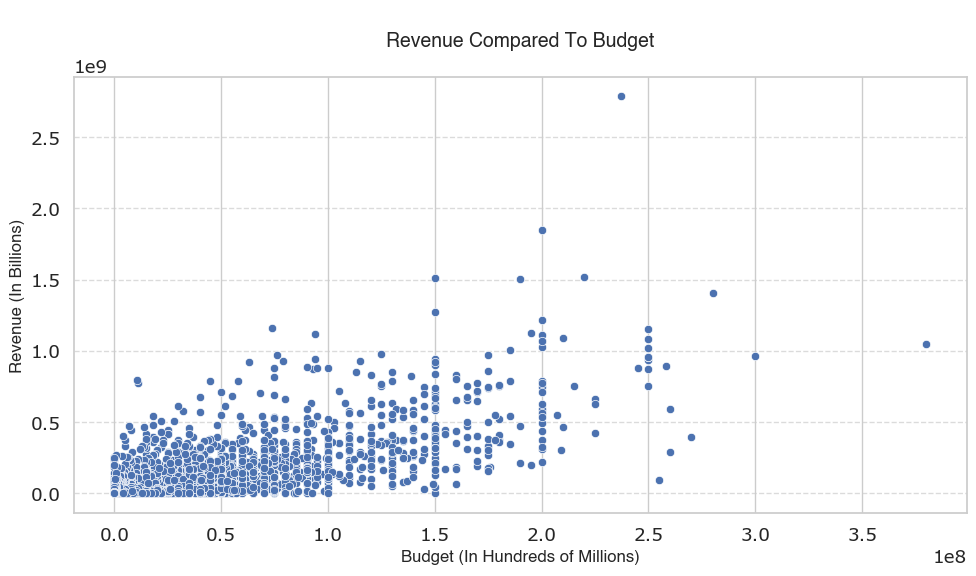

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', 
                y='revenue', 
                data=new_df,
               )
sns.set(font_scale=1.2, style='whitegrid', font='Verdana')
plt.xlabel('Budget (In Hundreds of Millions)', fontdict={'family': 'Helvetica', 'size': 12})
plt.ylabel('Revenue (In Billions)', fontdict={'family': 'Helvetica', 'size': 12})
plt.title('\nRevenue Compared To Budget\n', fontdict={'family': 'Helvetica', 'size': 14})
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

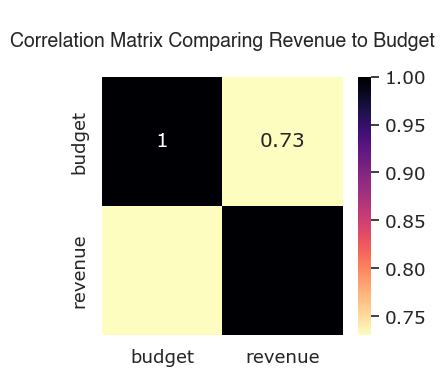

In [101]:
numeric_df = new_df.select_dtypes(include=np.number)

plt.figure(figsize = (4,4))

sns.heatmap(numeric_df.corr(),
            annot = True,
            cmap = 'magma_r',
           )

plt.title("\nCorrelation Matrix Comparing Revenue to Budget\n", fontdict={'family': 'Helvetica', 'size': 14})
plt.tight_layout()
plt.show()

From the scatter graph and correlation matrix, we can conclude that there is not a strong positive correlation between revenue and budget.

In [61]:
def extract_genres(x): 
    x = ast.literal_eval(x) ## Transform '['name', 'id']' back into ['name', 'id']
    Genres = [] ## Empty list to store the genres
    
    ''' Iterate through each dictionary '''
    for item in x: ## iterate for each dictionary in our list
        Genres.append(item['name']) ## Grab the 'name' key for each dictionary
        
    ''' Return the Genres'''
    return Genres

## Apply the function to genres
df['extracted_genres'] = df['genres'].apply(extract_genres)

In [62]:
# Expand the dataset out so that there is a single row for each genre
df_genres = df.explode('extracted_genres')
df_genres

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Adventure
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Fantasy
0,0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Science Fiction
1,1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Drama
4800,4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,Romance
4800,4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,...,2013-10-13,0,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,"Signed, Sealed, Delivered",7.0,6,TV Movie
4801,4801,0,[],http://shanghaicalling.com/,126186,[],en,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,...,2012-05-03,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Yorker in Shanghai,Shanghai Calling,5.7,7,NaN


In [82]:
revenue_by_genre = df_genres.groupby('extracted_genres')['revenue'].sum().sort_values(ascending=False).copy()
revenue_by_genre

extracted_genres
Adventure          164841561551
Action             162959914515
Comedy             122760517608
Drama              119710983984
Thriller           103250426269
Family              83283238689
Fantasy             81982199925
Science Fiction     81564235745
Romance             53642137545
Animation           52812167865
Crime               46040860686
Mystery             27248722761
Horror              22599894663
War                 12118445911
History             11332141732
Music                8964351078
Western              3792169111
Documentary          1082277678
Foreign                12398151
TV Movie                      0
Name: revenue, dtype: int64

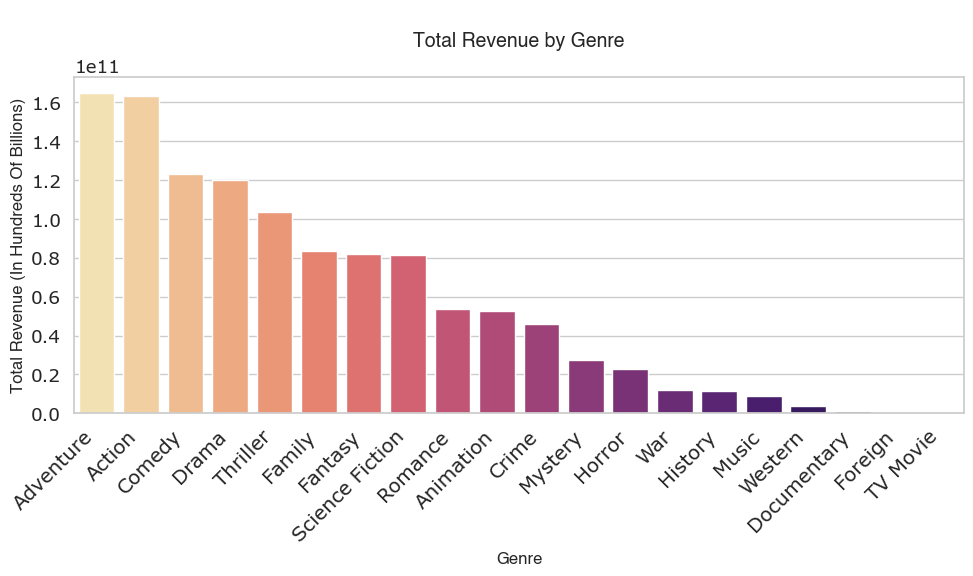

In [99]:
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_genre.index,
            y=revenue_by_genre.values,
            palette='magma_r'
           )
plt.xlabel('Genre', fontdict={'family': 'Helvetica', 'size': 12})
plt.ylabel('Total Revenue (In Hundreds Of Billions)', fontdict={'family': 'Helvetica', 'size': 12})
plt.title('\nTotal Revenue by Genre\n', fontdict={'family': 'Helvetica', 'size': 14})
plt.xticks(rotation=45,
            horizontalalignment = 'right',
            fontweight = 'light',
            fontsize =  'medium')
plt.tight_layout()
plt.show()

In [115]:
df['revenue_to_budget_ratio'] =  np.where(df['budget'] != 0, df['revenue'] / df['budget'], np.nan)
ratio_df = df.copy()
top_films = ratio_df.nlargest(10, 'revenue_to_budget_ratio')

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,revenue_to_budget_ratio
4238,4238,1,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",NaN,3082,"[{""id"": 1382, ""name"": ""factory""}, {""id"": 1546,...",en,Modern Times,The Tramp struggles to live in modern industri...,28.276480,...,8500000,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,He stands alone as the greatest entertainer of...,Modern Times,8.1,856,"[Drama, Comedy]",8.500000e+06
3137,3137,10,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",NaN,78383,"[{""id"": 428, ""name"": ""nurse""}, {""id"": 7098, ""n...",en,Nurse 3-D,"Abby Russell, a beautiful, dedicated nurse wit...",10.013629,...,10000000,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Your pain is her pleasure.,Nurse 3-D,4.9,119,"[Horror, Thriller]",1.000000e+06
4577,4577,15000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",http://www.paranormalactivity-movie.com/,23827,"[{""id"": 10224, ""name"": ""haunting""}, {""id"": 147...",en,Paranormal Activity,"After a young, middle class couple moves into ...",47.456823,...,193355800,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What Happens When You Sleep?,Paranormal Activity,5.9,1316,"[Horror, Mystery]",1.289039e+04
4582,4582,218,"[{""id"": 99, ""name"": ""Documentary""}, {""id"": 18,...",NaN,1435,"[{""id"": 222, ""name"": ""schizophrenia""}, {""id"": ...",en,Tarnation,Filmmaker Jonathan Caouette's documentary on g...,1.063439,...,1162014,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Tarnation,7.5,22,"[Documentary, Drama]",5.330339e+03
4496,4496,60000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",http://www.blairwitch.com/,2667,"[{""id"": 616, ""name"": ""witch""}, {""id"": 3392, ""n...",en,The Blair Witch Project,In October of 1994 three student filmmakers di...,41.690578,...,248000000,81.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The scariest movie of all time is a true story.,The Blair Witch Project,6.3,1055,"[Horror, Mystery]",4.133333e+03
4724,4724,10000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 14, ""name...",NaN,985,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 1852, ""n...",en,Eraserhead,Henry Spencer tries to survive his industrial ...,20.399578,...,7000000,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Where your nightmares end...,Eraserhead,7.5,485,"[Drama, Fantasy, Horror, Science Fiction]",7.000000e+02
4788,4788,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",NaN,692,"[{""id"": 237, ""name"": ""gay""}, {""id"": 900, ""name...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,...,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,An exercise in poor taste.,Pink Flamingos,6.2,110,"[Horror, Comedy, Crime]",5.000000e+02
4742,4742,65000,"[{""id"": 99, ""name"": ""Documentary""}, {""id"": 35,...",NaN,9372,"[{""id"": 1706, ""name"": ""experiment""}, {""id"": 37...",en,Super Size Me,Morgan Spurlock subjects himself to a diet bas...,10.400603,...,28575078,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The first ever reality-based movie ... everyth...,Super Size Me,6.6,506,"[Documentary, Comedy, Drama]",4.396166e+02
4723,4723,100000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",http://thegallowsmovie.com/,299245,"[{""id"": 2125, ""name"": ""gallows""}, {""id"": 6270,...",en,The Gallows,20 years after a horrific accident during a sm...,18.045782,...,42664410,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Every School Has Its Spirit,The Gallows,4.9,361,"[Horror, Thriller]",4.266441e+02
4514,4514,130000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",NaN,83,"[{""id"": 269, ""name"": ""diving""}, {""id"": 843, ""n...",en,Open 

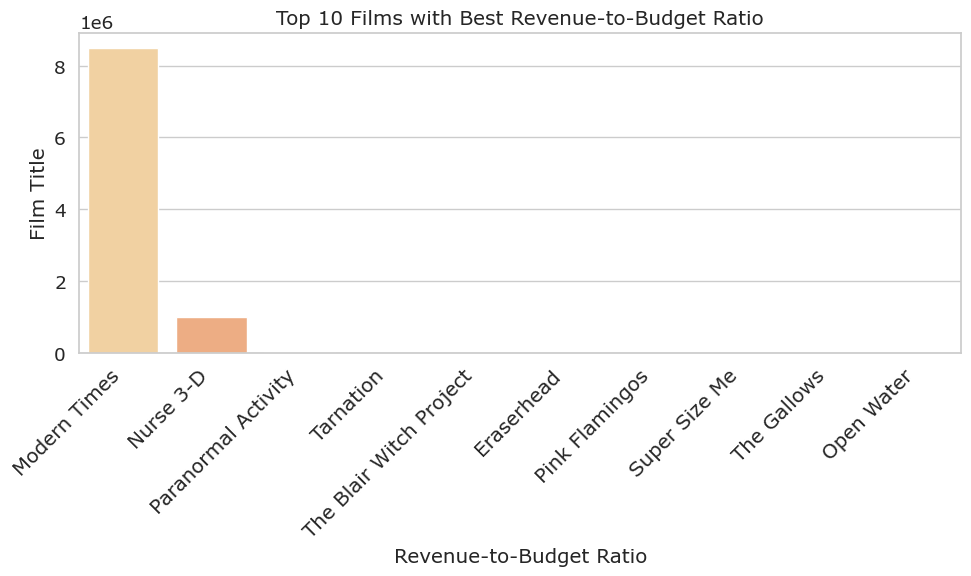

In [126]:
plt.figure(figsize=(10, 6))
sns.barplot(data=top_films, x='title',
            y='revenue_to_budget_ratio',
            palette='magma_r'
           )
plt.xlabel('Revenue-to-Budget Ratio')
plt.ylabel('Film Title')
plt.title('Top 10 Films with Best Revenue-to-Budget Ratio')
plt.xticks(rotation=45,
            horizontalalignment = 'right',
            fontweight = 'light',
            fontsize =  'medium')
plt.tight_layout()
plt.show()

2 film should be removed (Modern Times and Nurse 3-D) due to errors in their budget- 1 and 10 respectively.

In [133]:
rows = ['Modern Times', 'Nurse 3-D']
top_films_fixed = ratio_df[~ratio_df['title'].isin(rows)]

In [135]:
new_top_10 = top_films_fixed.nlargest(10, 'revenue_to_budget_ratio')
new_top_10

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,revenue_to_budget_ratio
4577,4577,15000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",http://www.paranormalactivity-movie.com/,23827,"[{""id"": 10224, ""name"": ""haunting""}, {""id"": 147...",en,Paranormal Activity,"After a young, middle class couple moves into ...",47.456823,...,193355800,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What Happens When You Sleep?,Paranormal Activity,5.9,1316,"[Horror, Mystery]",12890.386667
4582,4582,218,"[{""id"": 99, ""name"": ""Documentary""}, {""id"": 18,...",NaN,1435,"[{""id"": 222, ""name"": ""schizophrenia""}, {""id"": ...",en,Tarnation,Filmmaker Jonathan Caouette's documentary on g...,1.063439,...,1162014,91.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Tarnation,7.5,22,"[Documentary, Drama]",5330.339450
4496,4496,60000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",http://www.blairwitch.com/,2667,"[{""id"": 616, ""name"": ""witch""}, {""id"": 3392, ""n...",en,The Blair Witch Project,In October of 1994 three student filmmakers di...,41.690578,...,248000000,81.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The scariest movie of all time is a true story.,The Blair Witch Project,6.3,1055,"[Horror, Mystery]",4133.333333
4724,4724,10000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 14, ""name...",NaN,985,"[{""id"": 1009, ""name"": ""baby""}, {""id"": 1852, ""n...",en,Eraserhead,Henry Spencer tries to survive his industrial ...,20.399578,...,7000000,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Where your nightmares end...,Eraserhead,7.5,485,"[Drama, Fantasy, Horror, Science Fiction]",700.000000
4788,4788,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",NaN,692,"[{""id"": 237, ""name"": ""gay""}, {""id"": 900, ""name...",en,Pink Flamingos,Notorious Baltimore criminal and underground f...,4.553644,...,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,An exercise in poor taste.,Pink Flamingos,6.2,110,"[Horror, Comedy, Crime]",500.000000
4742,4742,65000,"[{""id"": 99, ""name"": ""Documentary""}, {""id"": 35,...",NaN,9372,"[{""id"": 1706, ""name"": ""experiment""}, {""id"": 37...",en,Super Size Me,Morgan Spurlock subjects himself to a diet bas...,10.400603,...,28575078,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The first ever reality-based movie ... everyth...,Super Size Me,6.6,506,"[Documentary, Comedy, Drama]",439.616585
4723,4723,100000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",http://thegallowsmovie.com/,299245,"[{""id"": 2125, ""name"": ""gallows""}, {""id"": 6270,...",en,The Gallows,20 years after a horrific accident during a sm...,18.045782,...,42664410,87.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Every School Has Its Spirit,The Gallows,4.9,361,"[Horror, Thriller]",426.644100
4514,4514,130000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",NaN,83,"[{""id"": 269, ""name"": ""diving""}, {""id"": 843, ""n...",en,Open Water,Two divers are left out at sea without a boat....,15.611857,...,54667954,79.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Scream all you want.,Open Water,5.4,315,"[Drama, Thriller]",420.522723
3159,3159,85000,"[{""id"": 27, ""name"": ""Horror""}]",NaN,30497,"[{""id"": 1420, ""name"": ""gas station""}, {""id"": 1...",en,The Texas Chain Saw Massacre,Five friends visiting their grandfather's hous...,29.262427,...,30859000,83.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Who will survive and what will be left of them?,The Texas Chain Saw Massacre,7.2,590,[Horror],363.047059
4441,4441,858000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 18, ""...",http://movies.disney.com/bambi,3170,"[{""id"": 5774, ""name"": ""forest""}, {""id"": 10683,

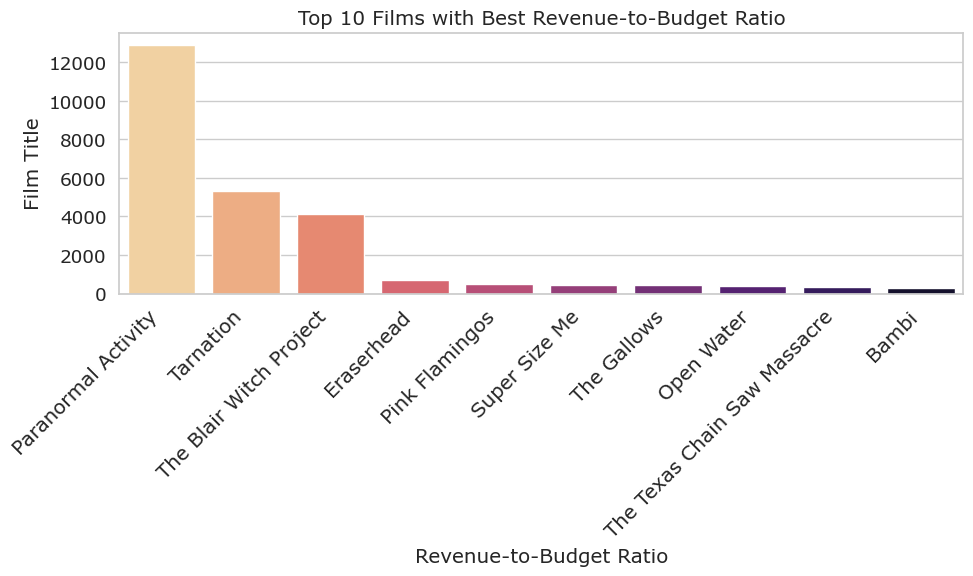

In [136]:
plt.figure(figsize=(10, 6))
sns.barplot(data=new_top_10, x='title',
            y='revenue_to_budget_ratio',
            palette='magma_r'
           )
plt.xlabel('Revenue-to-Budget Ratio')
plt.ylabel('Film Title')
plt.title('Top 10 Films with Best Revenue-to-Budget Ratio')
plt.xticks(rotation=45,
            horizontalalignment = 'right',
            fontweight = 'light',
            fontsize =  'medium')
plt.tight_layout()
plt.show()

In [146]:
new_top_10['extracted_genres'] = new_top_10['genres'].apply(extract_genres)
genre_10 = new_top_10.explode('extracted_genres')
genre_10 = genre_10['extracted_genres'].value_counts()
genre_10

extracted_genres
Horror             6
Drama              5
Mystery            2
Documentary        2
Comedy             2
Thriller           2
Fantasy            1
Science Fiction    1
Crime              1
Animation          1
Family             1
Name: count, dtype: int64

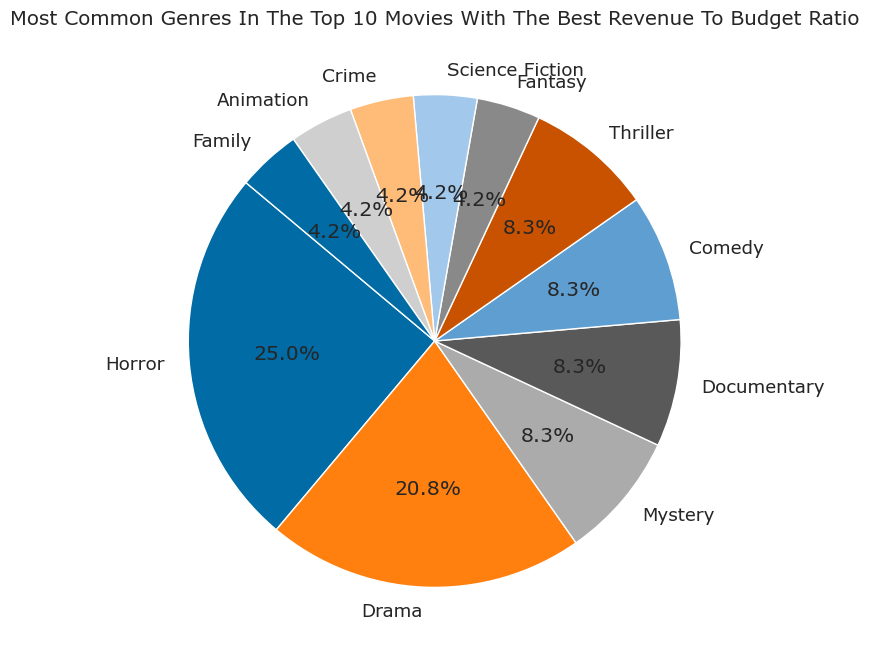

In [148]:
plt.figure(figsize=(8, 8))
plt.pie(genre_10.values, labels=genre_10.index, autopct='%1.1f%%', startangle=140)
plt.title("Most Common Genres In The Top 10 Movies With The Best Revenue To Budget Ratio")
plt.style.use('tableau-colorblind10')
plt.show()

From this, it can be seen that movies with the best revenue to budget ratios have horror among their genres.

In [124]:
ratio_df[(ratio_df['title'] == 'Paranormal Activity')]

,index,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,extracted_genres,revenue_to_budget_ratio
4577,4577,15000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",http://www.paranormalactivity-movie.com/,23827,"[{""id"": 10224, ""name"": ""haunting""}, {""id"": 147...",en,Paranormal Activity,"After a young, middle class couple moves into ...",47.456823,...,193355800,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,What Happens When You Sleep?,Paranormal Activity,5.9,1316,"[Horror, Mystery]",12890.386667
